In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mplfinance as fin
import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")
# get 1mo data
hist = msft.history(period="12mo")

In [3]:
print(f"{hist.size}")
hist.head()

1757


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-11 00:00:00-05:00,300.375422,301.465217,291.488691,292.301086,39175600,0.00,0
2022-02-14 00:00:00-05:00,291.042882,294.005146,288.645364,292.261475,36359500,0.00,0
2022-02-15 00:00:00-05:00,297.224973,298.007618,294.262709,297.680695,27058300,0.00,0
2022-02-16 00:00:00-05:00,296.211361,298.693274,291.555290,297.333191,29982100,0.62,0
2022-02-17 00:00:00-05:00,294.215922,294.652741,287.901949,288.626678,32461600,0.00,0


In [4]:
hist.index.values

array(['2022-02-11T05:00:00.000000000', '2022-02-14T05:00:00.000000000',
       '2022-02-15T05:00:00.000000000', '2022-02-16T05:00:00.000000000',
       '2022-02-17T05:00:00.000000000', '2022-02-18T05:00:00.000000000',
       '2022-02-22T05:00:00.000000000', '2022-02-23T05:00:00.000000000',
       '2022-02-24T05:00:00.000000000', '2022-02-25T05:00:00.000000000',
       '2022-02-28T05:00:00.000000000', '2022-03-01T05:00:00.000000000',
       '2022-03-02T05:00:00.000000000', '2022-03-03T05:00:00.000000000',
       '2022-03-04T05:00:00.000000000', '2022-03-07T05:00:00.000000000',
       '2022-03-08T05:00:00.000000000', '2022-03-09T05:00:00.000000000',
       '2022-03-10T05:00:00.000000000', '2022-03-11T05:00:00.000000000',
       '2022-03-14T04:00:00.000000000', '2022-03-15T04:00:00.000000000',
       '2022-03-16T04:00:00.000000000', '2022-03-17T04:00:00.000000000',
       '2022-03-18T04:00:00.000000000', '2022-03-21T04:00:00.000000000',
       '2022-03-22T04:00:00.000000000', '2022-03-23

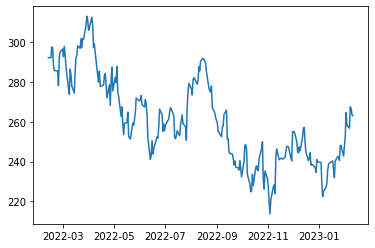

In [5]:
plt.plot(hist["Close"])

In [6]:
def ichimoku_indicator(data,
    tenkan=9,
    kijun=26,
    chiou=-26,
    senkou_a=26,
    senkou_b=52,
    chikou=None
):
    """ Implements Ichimoku momentum indicator.
    It requires  5 different components.
    
    1 - Tenkan-Sen aka Conversion line: midpoint of the last 9 candles.
        Computed by adding highest high and lowest low over 9 different
        periods and divided by 2.

    2 - Kijun-Sen aka Base line: midpoint of the last 26 candlesticks.
        Computed as Tenkan-Sen, but using 26 candlesticks.
        
    3 - Chiou aka Lagging span: lags behind price with 26 periods.
    
    4 - Senkou-A aka Leading span A: midpoint between the conversion line
        and the base line. Computed as (Conversion Line + Base Line) / 2.
        Plotted 26 periods in the future.
    
    5 - Senjou-B aka Leading span B: midpoint as the leading span A, but
        using 52 periods.
    
    6 - (Optional) Chikou span: Closing prices plotted 26 periods back
        in time.
    
    """
    ichimoku_data = data
    # conversion line
    tenkan_sen_high = data["High"].rolling(window=tenkan).max()
    tenkan_sen_low = data["Low"].rolling(window=tenkan).min()
    ichimoku_data["conversion_line"] = (tenkan_sen_high + tenkan_sen_low) / 2
    # base line
    kijun_sen_high = data["High"].rolling(window=kijun).max()
    kijun_sen_low = data["Low"].rolling(window=kijun).min()
    ichimoku_data["base_line"] = (kijun_sen_high + kijun_sen_low) / 2
    # leading span A
    leading_a = ((ichimoku_data["conversion_line"] + ichimoku_data["base_line"]) / 2
                ).shift(senkou_a)
    ichimoku_data["leading_a"] = leading_a
    # leading span B
    leading_b_high = data["High"].rolling(window=senkou_b).max()
    leading_b_low = data["Low"].rolling(window=senkou_b).min()
    leading_b = ((leading_b_high + leading_b_low) / 2).shift(senkou_b)
    ichimoku_data["leading_b"] = leading_b
    # chikou (Not implemented)
    
    return ichimoku_data

def process_data(data):
    """Process data into the desired format for different indicators"""
    output = pd.DataFrame({
        'Dates': data.index.values,
        'High': data["High"],
        'Low': data["Low"],
        'Open': data["Open"],
        'Close': data["Close"],
    })
    
    return output

def plot_all(raw_data):
    """Handles all plotting"""
    processed_data = process_data(raw_data)
    fig, ax = plt.subplots(figsize=(14, 8))
    plot_ichimoku_curves(processed_data, fig, ax)
    #fin.plot(processed_data, type="candle")
    plt.legend()
    plt.show()

def plot_ichimoku_curves(processed_data, fig, ax):
    """Plots ichimoku curves from processed data"""
    ichimoku_data = ichimoku_indicator(processed_data)
    date_axis = processed_data["Dates"]
    plt.title("Ichimoku Curves")
    plt.xlabel("Date", fontsize=7)
    plt.ylabel("Price", fontsize=7)
    #plt.plot(ichimoku_data["close"], label='close', color="black", linestyle='dashed')
    plt.plot(ichimoku_data["conversion_line"], label='conversion_line', color="darkgreen")
    plt.plot(ichimoku_data["base_line"], label='base_line', color="darkblue")
    plt.plot(ichimoku_data["leading_a"], label='leading_a', color="green")
    plt.plot(ichimoku_data["leading_b"], label='leading_b', color="red")
    # green cloud
    ax.fill_between(ichimoku_data["Dates"],
                    ichimoku_data["leading_a"], ichimoku_data["leading_b"],
                    where=ichimoku_data["leading_a"] > ichimoku_data["leading_b"],
                   facecolor="green")
    # red cloud
    ax.fill_between(ichimoku_data["Dates"],
                    ichimoku_data["leading_a"], ichimoku_data["leading_b"],
                    where=ichimoku_data["leading_a"] < ichimoku_data["leading_b"],
                   facecolor="red")

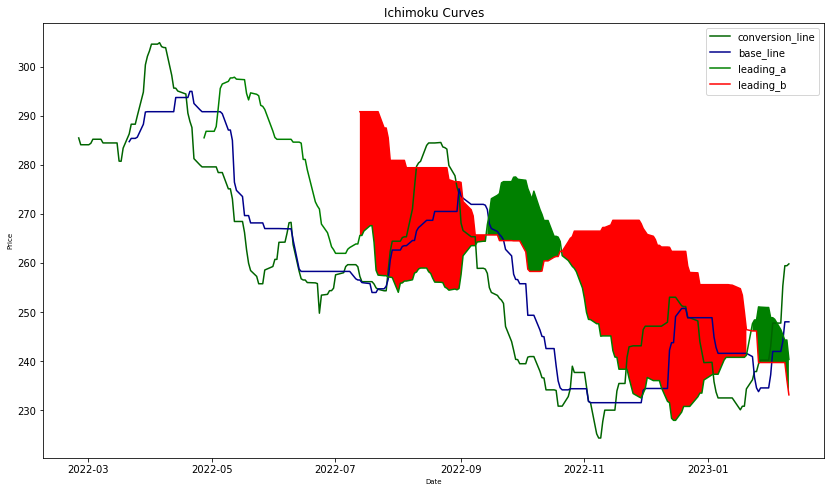

In [7]:
plot_all(hist)